In [21]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3('voyager.mp3')
mono_audios = sound.split_to_mono()
mono_left = mono_audios[0].export(
    "D:\Git\Voyager_Golden_Record\\mono_left.wav",
    format="wav")
mono_right = mono_audios[1].export(
    "D:\Git\Voyager_Golden_Record\\mono_right.wav",
    format="wav")

In [22]:
# binary number that repesent the length of each wave
WavelengthInBinary = '101101001100000000000000'
WavelengthInDec = int(WavelengthInBinary, 2)
print(f"should be {WavelengthInDec} ")
a = 11845632 * pow(10, -10)
wavelength = a * 44100
print(wavelength)
print (a)
# ToDo: find what are the units for this time 11845632 
 #apper on the disk as lines in second image, apper to be the number of waves per image
NumberOfWavesInBinary = '1000000000'
NumberOfWavesInDec = int(NumberOfWavesInBinary, 2)
print(f"should be line {NumberOfWavesInDec} in the images")

should be 11845632 
52.239237120000006
0.0011845632
should be line 512 in the images


In [2]:
from pydub import AudioSegment
from pydub.utils import get_array_type
import os
import array
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from PIL import Image


length = 947.7119954648526s


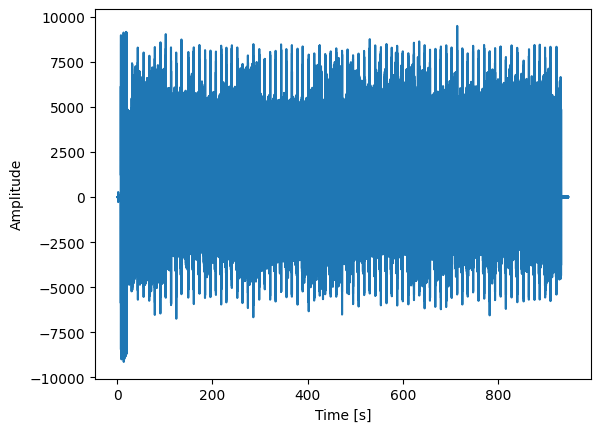

In [3]:
wav_fname = "D:\\Git\\Voyager_Golden_Record\\mono_left.wav"
#spio.wavfile.read(wav_fname)
samplerate, data = spio.wavfile.read(wav_fname)
length = data.shape[0] / samplerate
print(f"length = {length}s")
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:], label="Left channel")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


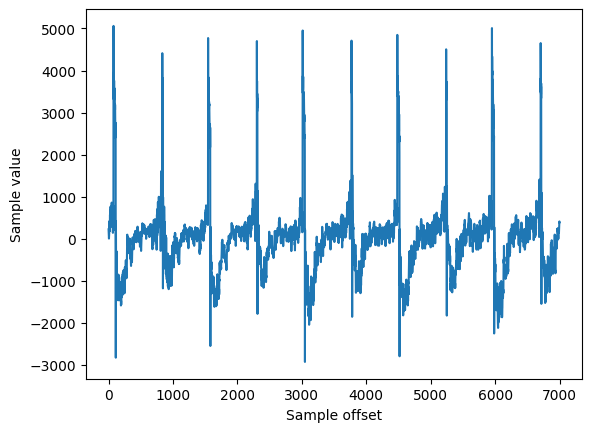

In [25]:
offset = samplerate*150   
window = data[offset:offset+7000]
plt.plot(range(len(window)), window)
plt.xlabel("Sample offset")
plt.ylabel("Sample value")  
plt.show()

In [26]:
#should clip data to match the signal on the record 
# should turn the signal upside down to match the signal on the record??


41794099
30.0
55.0
2425500


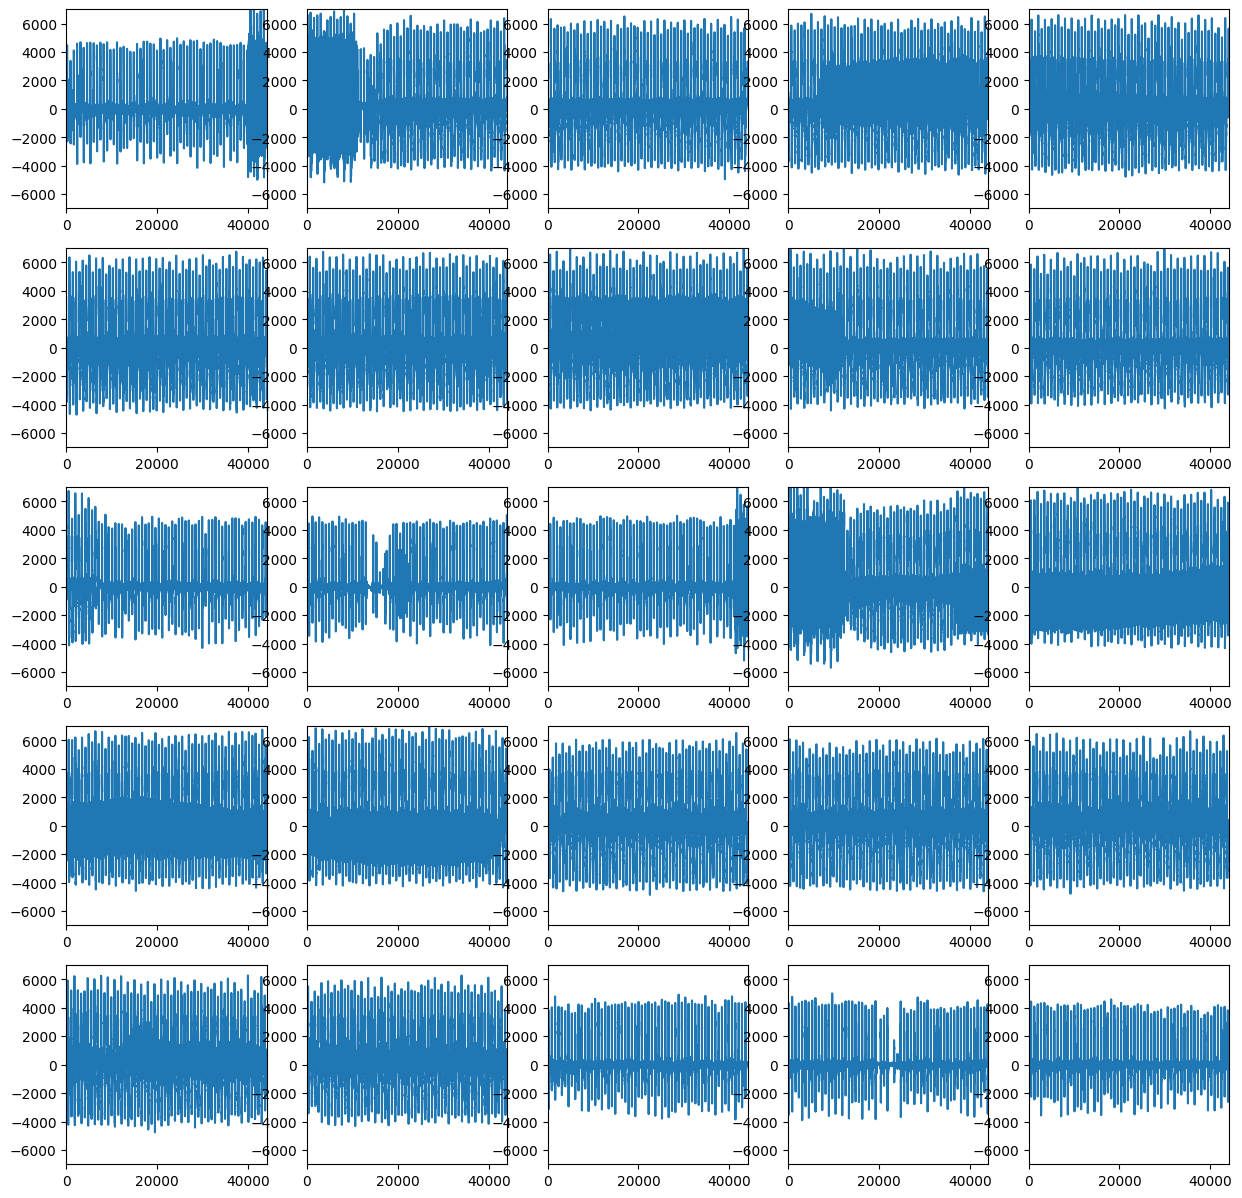

In [27]:
#plot every second for 25 second stright
timesteps = len(time)
print(timesteps)
offset = round(samplerate*30)
#offset = 50000  
print(offset/samplerate)

window_size = samplerate
#window_size = 3200
print(offset/samplerate+25)
print(offset+25*samplerate)
a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(a, b, c)
    plt.plot(data[offset + samplerate*i :offset + samplerate*i + window_size])
    plt.axis([0, window_size, -7000, 7000])

    c = c + 1

41794099
38.0
1675800
39.24716553287982
1730800


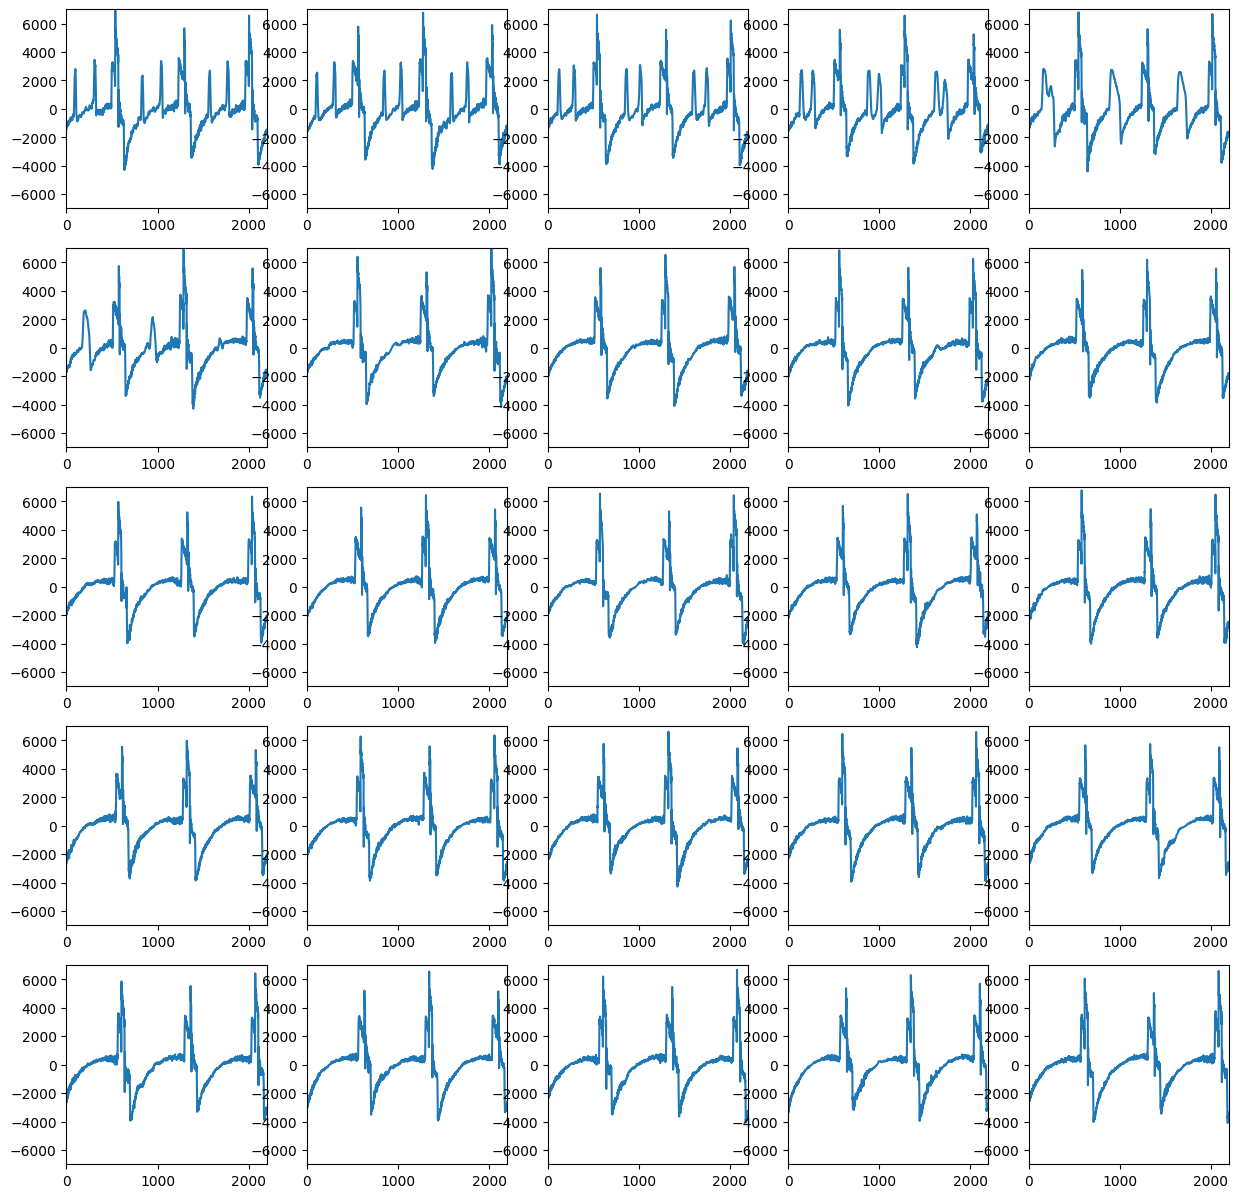

In [75]:
# ploting windows in a row to watch a snigle signal
timesteps = len(time)
print(timesteps)
offset = round(samplerate*182.82)
offset = round(samplerate*122)
offset = samplerate*38
print(offset/samplerate)
print(offset)

window_size = 2200
print((offset+25*window_size)/samplerate)
print(offset+25*window_size)
a = 5  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(a, b, c)
    plt.plot(data[offset + window_size*i:offset + window_size*(i+1)])
    plt.axis([0, window_size, -7000, 7000])

    c = c + 1


38.0


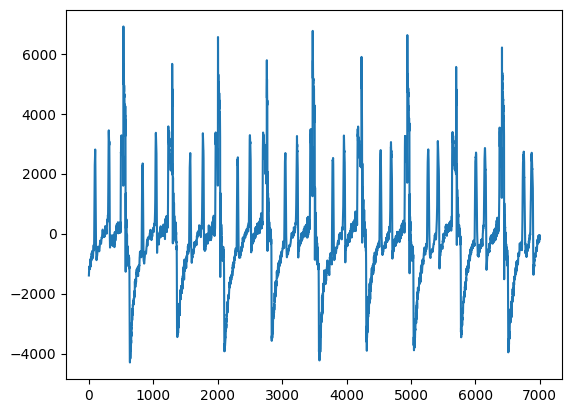

In [79]:
offset = samplerate*38    
window_size = 7000
window = data[offset:offset+window_size]
plt.plot(range(len(window)), window[:], label="Left channel")
print(offset/samplerate)

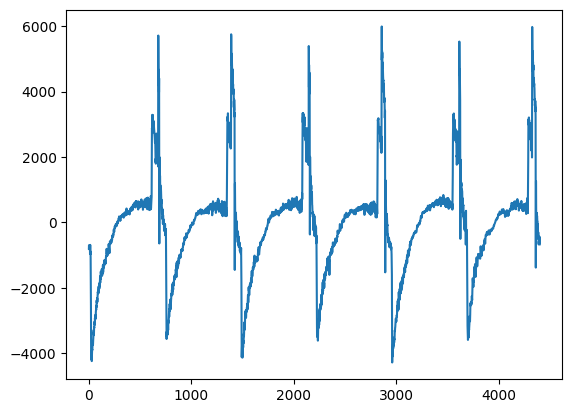

In [83]:
# the strong signal could be noise, maybe the stuff after
#  the strong noise is the row signal and 
# then go to 0 for the next linw to start
#should be 512 signal per image
#doing high pass/low pass filter
offset = samplerate*32 +2300   
window_size = 4400
window = data[offset:offset+window_size]
plt.plot(range(len(window)), window[:], label="Left channel")


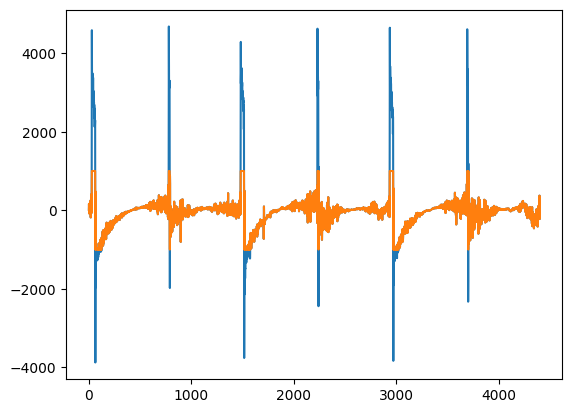

In [31]:
line_hz = samplerate / window_size
from scipy.signal import butter, filtfilt
N = 3
nyquist = samplerate / 2
Wn = line_hz / nyquist
b, a = butter(N, Wn, 'highpass',analog='true')
x = filtfilt(b, a, window)
plt.plot(range(len(x)), x[:], label="Left channel")
x = np.clip(x,-1000,1000)
plt.plot(range(len(x)), x[:], label="Left channel")



start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

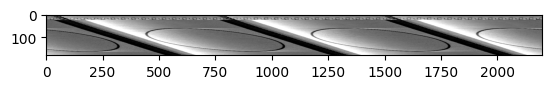

In [4]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
offset = samplerate*30 +2300 
for index in range(180):
    window = data[offset+index*window_size:offset+(index+1)*window_size]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[1:window_size])
plt.imshow(image_data,cmap="gray")
plt.show()


start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

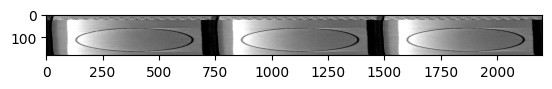

In [10]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = window_size/(3.8*220)
offset = samplerate*30 +2300 
for index in range(180):
    window = data[offset+index*window_size + int(1.2*adjust_offset*index):offset+(index+1)*window_size + int(1.2*adjust_offset*index)]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[0:window_size])
plt.imshow(image_data,cmap="gray")
plt.show()


start at 30.052154195011337, end at 30.102040816326532  
start at 30.102040816326532, end at 30.151927437641724  
start at 30.151927437641724, end at 30.201814058956916  
start at 30.201814058956916, end at 30.25170068027211  
start at 30.25170068027211, end at 30.3015873015873  
start at 30.3015873015873, end at 30.351473922902493  
start at 30.351473922902493, end at 30.401360544217688  
start at 30.401360544217688, end at 30.45124716553288  
start at 30.45124716553288, end at 30.501133786848072  
start at 30.501133786848072, end at 30.551020408163264  
start at 30.551020408163264, end at 30.600907029478456  
start at 30.600907029478456, end at 30.650793650793652  
start at 30.650793650793652, end at 30.700680272108844  
start at 30.700680272108844, end at 30.750566893424036  
start at 30.750566893424036, end at 30.800453514739228  
start at 30.800453514739228, end at 30.85034013605442  
start at 30.85034013605442, end at 30.900226757369616  
start at 30.900226757369616, end at 30.95

TypeError: Image data of dtype object cannot be converted to float

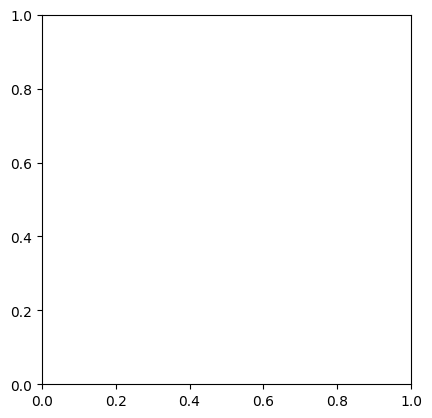

In [20]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = window_size/(3.8*220)
offset = samplerate*30 +2300 
for index in range(180):
    window = data[offset+index*window_size + int(1.2*adjust_offset*index):offset+(index+1)*window_size + int(1.2*adjust_offset*index)]
    print(f"start at {(offset+index*window_size)/samplerate}, end at {(offset+(index+1)*window_size)/samplerate}  ")
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[0:699])
    image_data.append(-0.5*x[700:1400])
    image_data.append(-0.5*x[1499:2199])

plt.imshow(image_data,cmap="gray")
plt.show()


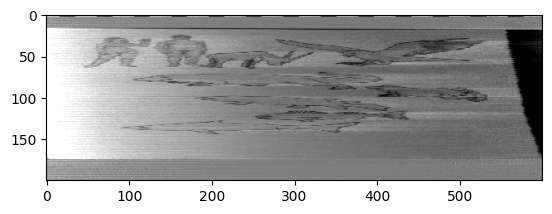

In [120]:
from scipy.signal import butter, filtfilt
image_data = []
window_size = 2200
line_hz = samplerate / window_size
nyquist = samplerate / 2
Wn = line_hz / nyquist
adjust_offset = 0
for index in range(200):
    offset = int(samplerate*899.0) +2300 
    window = data[offset+index*window_size:offset+2200+index*window_size]
    b, a = butter(3, Wn, 'highpass',analog='false')
    x = filtfilt(b, a, window)
    x = np.clip(x,-2500,2500)
    image_data.append(-0.5*x[800:1400])
plt.imshow(image_data,cmap="gray")
plt.show()